# Statistik-Labor Testat Aufgabe 1
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***. In der Datei bekommen Sie jeweils die ersten beiden Nachkommastellen des Durchschnittsalters.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:*** Bitte beachten Sie bei der Abgabe, dass Sie auf keinen Fall die Liste mit den 100 Datensätzen ausgeben! Verwenden Sie dafür zum Beispiel die `dataframe.head(x)`-Funktion.

In [1]:
import pandas as pd


#ToDo: 1. Ersetzen Sie im Dateinamen xy durch entsprechende Matrikelnummer
#      2. Lassen Sie sich alle Daten anzeigen, um "fehlerhafte" Daten zu erkennen

data = pd.read_csv('sr_aufg_1_96.txt', sep=';', 
            encoding='unicode_escape', na_values='.', header = None, 
            names=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'])
pd.set_option('display.max_rows',None)

## 2. Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Listen Sie in einer Tabelle auf, welche (Daten-)Sätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 

***Tipp:*** Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>
***Beispiellösung:***
![Beispiellösung](https://raw.githubusercontent.com/soboettc/Images_lab/main/Testat1-Aufgabe2.PNG?token=GHSAT0AAAAAACALGLB24ZB4QOBWWXN7JU5EZAZ32CQ)

In [2]:
data = data.drop([ 1, 9, 23, 24, 60, 84 ,98 , 101], axis = 0) 
data = data.reset_index() 
data = data.drop('index', axis = 1)
data.at[20, 'Geburtsdatum'] = '05.07.1959'

data.at[45, 'Geburtsdatum'] = '14.02.1972'

data.at[60, 'Geburtsdatum'] = '11.12.1958'

data.at[83, 'Geburtsdatum'] = '29.12.1944'

## 3. Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geborgen ist, ist zum Stichtag 30 Jahre alt. <br>
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipp:*** In Python ist hierzu die Pandas-Bibliothek mit ihre Funktion `pandas.to_datetime()`, sowie `pandas.year` nützlich.

In [3]:
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], infer_datetime_format=True)

In [4]:
stichtag = pd.to_datetime('31.12.2005', infer_datetime_format=True)

In [5]:
for i in range (len(data)):
    data.at[i, 'Alter'] = stichtag.year - data.at[i, 'Geburtsdatum'].year

## 4. Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden.

***Tipp:*** Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`. <br>
***Beispiellösung:***
<div>
<img src="https://raw.githubusercontent.com/soboettc/Images_lab/main/Testat1-Aufgabe4.PNG?token=GHSAT0AAAAAACALGLB36URB5ZUPQHG4REW4ZAZ4AEQ" width="500"/>
</div>

In [6]:
aKlasse = [0,20,30,40,50,100]
aGruppen = ['(0,20]','(20,30]','(30,40]','(40,50]','(50,100]']

data['Altersklassen'] = pd.cut(data['Alter'], aKlasse, labels = aGruppen)  

In [7]:
dataF = data[data['Anrede'] == 'Frau']

dataM = data[data['Anrede'] == 'Herr']


In [8]:
#Dataframe zur Häufigkeitsverteilung des Alters nach Geschlecht
#sortiert die Herren mit den Altersklassen nach der Häufigkeit
hf_H = pd.value_counts(dataM['Altersklassen'], sort = False). rename_axis('Alter').reset_index(name= 'Häufigkeit Männlich')
total_H = hf_H['Häufigkeit Männlich'].sum()

hf_H.loc[5] = ['Summe', total_H] #loc lokalisiert alle Herren Werte von allen 5 Altersklassen
#sortiert die Frauen mit den Altersklassen nach der Häufigkeit
hf_F = pd.value_counts(dataF['Altersklassen'], sort = False). rename_axis('Alter').reset_index(name= 'Häufigkeit Weiblich')
total_F = hf_F['Häufigkeit Weiblich'].sum()
hf_F.loc[5] = ['Summe', total_F]
#merge verbindet die dataFrames
hf_New = hf_H.merge(hf_F, how = 'outer')

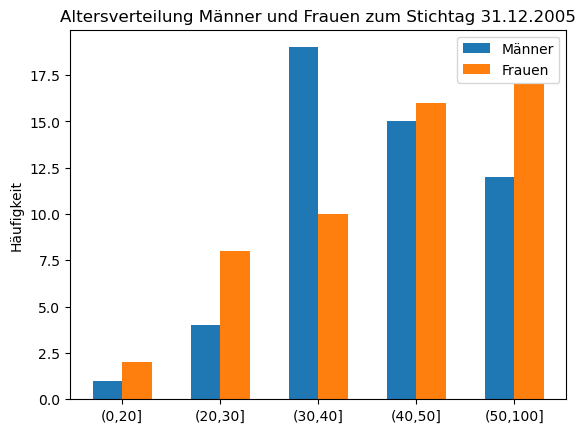

In [9]:
from matplotlib import pyplot as plt
import numpy as n

label = hf_New['Alter'][0:5]
ma = hf_New['Häufigkeit Männlich'][0:5]
fr = hf_New['Häufigkeit Weiblich'][0:5]

x = n.arange(len(label))


fig, plt = plt.subplots()
p1 = plt.bar(x - 0.3/2, ma, 0.3, label='Männer')
p2 = plt.bar(x + 0.3/2, fr, 0.3, label='Frauen')

    
plt.set_ylabel('Häufigkeit')
plt.set_title('Altersverteilung Männer und Frauen zum Stichtag 31.12.2005')
plt.set_xticks(x)
plt.set_xticklabels(label)
plt.legend()

## 5. Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Beispiellösung:***
<div>
<img src="https://raw.githubusercontent.com/soboettc/Images_lab/main/Testat1-Aufgabe5.PNG?token=GHSAT0AAAAAACALGLB2IRVPHC4TRSX4BTEYZAZ4AZQ" width="300"/>
</div>

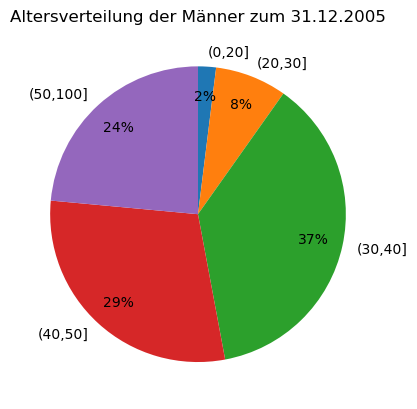

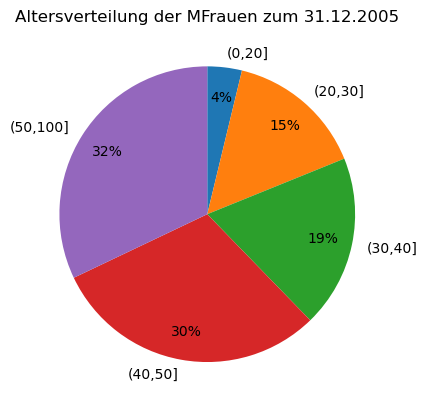

In [10]:
#relative Häüfigkeiten u. Tortendiagramm Männer
from matplotlib import pyplot as plt

x_m  = hf_New['Häufigkeit Männlich'][0:5]
label_m = hf_New['Alter'][0:5]

plt.pie(x_m, labels=label_m, autopct='%.0f%%', pctdistance=0.8, startangle=90,
        counterclock=False)
plt.title("Altersverteilung der Männer zum 31.12.2005")
plt.show()
#relative Häüfigkeiten u. Tortendiagramm Frauen


x_f  = hf_New['Häufigkeit Weiblich'][0:5]
label_f = hf_New['Alter'][0:5]

plt.pie(x_f, labels=label_f, autopct='%.0f%%', pctdistance=0.8, startangle=90,
        counterclock=False)
plt.title("Altersverteilung der MFrauen zum 31.12.2005")
plt.show()

## 6. Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Beispiellösung:***
<div>
<img src="https://raw.githubusercontent.com/soboettc/Images_lab/main/Testat1-Aufgabe6.PNG?token=GHSAT0AAAAAACALGLB2YDRDK3F565CHFL4KZAZ4BHA" width="500"/>
</div>

In [1]:
#arithmetischer Mittelwert
mittel_ges = data['Alter'].mean()
mittel_w = dataF['Alter'].mean()
mittel_m = dataM['Alter'].mean()

NameError: name 'data' is not defined

In [ ]:
#Varianz
var_ges = data['Alter'].var()
var_w = dataF['Alter'].var()
var_m = dataM['Alter'].var()

In [2]:
#Standardabweichung
std_ges = data['Alter'].std()
std_w = dataF['Alter'].std()
std_m = dataM['Alter'].std()

NameError: name 'data' is not defined

In [3]:
#Median
med_ges = data['Alter'].median()
med_w = dataF['Alter'].median()
med_m = dataM['Alter'].median()

NameError: name 'data' is not defined

In [4]:
#Spannweite
sp_ges = data['Alter'].max()-data['Alter'].min()
sp_w = dataF['Alter'].max()-dataF['Alter'].min()
sp_m = dataM['Alter'].max()-dataM['Alter'].min()

NameError: name 'data' is not defined